In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Setting up our datasets
bottle = pd.read_csv('bottle.csv')
bottle = bottle[['Salnty', 'T_degC']]
bottle.columns = ['Sal', 'Temp']

# Limiting amount of entries to speed up regression time
bottle = bottle[:][:500]

print(bottle.head())

/home/saeedosat/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


      Sal   Temp
0  33.440  10.50
1  33.440  10.46
2  33.437  10.46
3  33.420  10.45
4  33.421  10.45


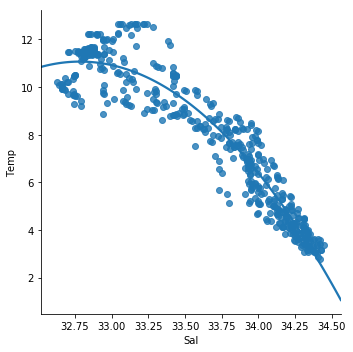

In [2]:
# This produces a scatter 
sns.lmplot(x="Sal", y="Temp", data=bottle,
           order=2, ci=None);

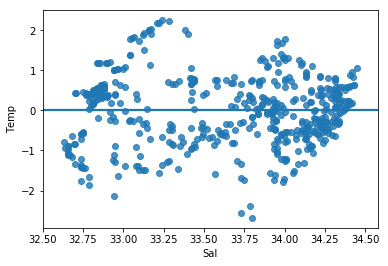

In [3]:


# Picturing a residual plot to check for heteroscedasticity 
sns.residplot(bottle['Sal'], bottle['Temp'], order=2, lowess=True)



In [4]:
# Eliminating NaN or missing input numbers
bottle.fillna(method='ffill', inplace=True)

In [5]:
# Set up the training data
X = np.array(bottle['Sal']).reshape(-1, 1)
y = np.array(bottle['Temp']).reshape(-1, 1)

bottle.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.8406304462431902


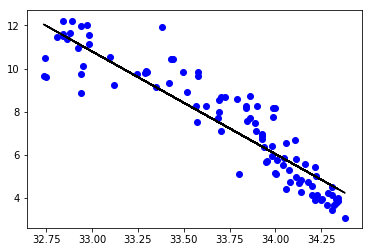

In [6]:
# Make predictions using the new model
y_pred = clf.predict(X_test)
plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, y_pred, color='k')
plt.show()

In [7]:
from maxvolpy.maxvol import rect_maxvol

In [8]:
X.shape

(500, 1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
random_accuracies = []
rectmaxvol_accuracies = []
clf = LinearRegression()
for n in np.arange(10, 400, 10):
    index = np.random.choice(X_train.shape[0], n, replace=False)
    X_train_random = X_train[index]
    y_train_random = y_train[index]
    clf.fit(X_train_random, y_train_random)
    accuracy = clf.score(X_test, y_test)
    random_accuracies.append(accuracy)
    piv, C = rect_maxvol(X_train, minK=n, maxK=n)
    X_train_rectmaxvol = X_train[piv]
    y_train_rectmaxvol = y_train[piv]
    clf.fit(X_train_rectmaxvol, y_train_rectmaxvol)
    accuracy = clf.score(X_test, y_test)
    rectmaxvol_accuracies.append(accuracy)
    

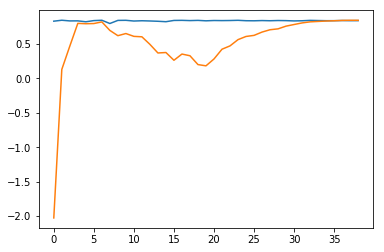

In [11]:
plt.plot(random_accuracies)
plt.plot(rectmaxvol_accuracies)
plt.show()

In [22]:
dict = {}
for index, item in enumerate(rectmaxvol_accuracies):
    for index1, item1 in enumerate(random_accuracies):
        if index < index1:
            if item > item1:
                print(index)
                print(item)
                print("===>")
                print(index1)
                print(item1)
                print("-------------------------------")
            


3
0.8021250645132677
===>
7
0.8000263047647657
-------------------------------
6
0.8234424708914186
===>
7
0.8000263047647657
-------------------------------
36
0.8448759113597307
===>
37
0.8415012819265923
-------------------------------
36
0.8448759113597307
===>
38
0.8420503659617073
-------------------------------
37
0.8470534693342651
===>
38
0.8420503659617073
-------------------------------
